### Описание задания
А/А-тестирование мобильного приложения. Необходимо посчитать результаты A/A-теста, проверяя метрику качества FPR (будем проверять на конверсии в покупку). Известно, что сплит-система сломана. Требуется проверить утверждение о поломке и найти ее причины, если сплит-система действительно сломана

In [7]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt

from tqdm.auto import tqdm

In [8]:
df = pd.read_csv('/home/jupyter-v.kotov-16/Lesson_10_stat/hw_aa.csv', sep = ';')

In [9]:
df.head()

,Unnamed: 0,uid,experimentVariant,version,purchase
0,1,c4ca4238a0b923820dcc509a6f75849b,1,v2.8.0,0
1,2,c81e728d9d4c2f636f067f89cc14862c,0,v2.9.0,0
2,3,eccbc87e4b5ce2fe28308fd9f2a7baf3,1,v2.9.0,0
3,4,a87ff679a2f3e71d9181a67b7542122c,1,v2.8.0,0
4,5,e4da3b7fbbce2345d7772b0674a318d5,1,v2.8.0,0


In [14]:
df.groupby(['experimentVariant', 'version'])\
    .agg({'purchase' : 'mean', 'Unnamed: 0' : 'count'})\
    .rename(columns = {'purchase' : 'CR', 'Unnamed: 0' : 'amount'})

CR  amount
experimentVariant version                   
0                 v2.8.0    0.000993   41283
                  v2.9.0    0.074658   11921
                  v3.7.4.0  0.059943    4204
                  v3.8.0.0  0.057604    5694
1                 v2.8.0    0.045606   41552
                  v2.9.0    0.071304   12033
                  v3.7.4.0  0.063018    4221
                  v3.8.0.0  0.062848    6110

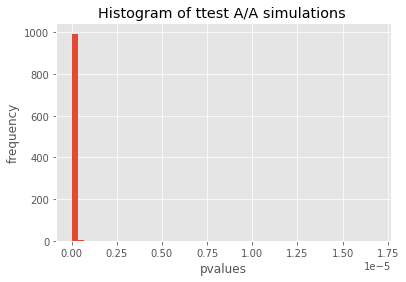

1.0

In [11]:
simulations = 1000
n_s = 1000
res = []

# Запуск симуляций A/A теста
for i in tqdm(range(simulations)):
    s1 = df[(df.experimentVariant == 0) & (df.version == 'v2.8.0')]['purchase'].sample(n_s, replace = False).values
    s2 = df[(df.experimentVariant == 1) & (df.version == 'v2.8.0')]['purchase'].sample(n_s, replace = False).values
    res.append(stats.ttest_ind(s1, s2, equal_var = False)[1]) # сохраняем pvalue

plt.hist(res, bins = 50)
plt.style.use('ggplot')
plt.xlabel('pvalues')
plt.ylabel('frequency')
plt.title("Histogram of ttest A/A simulations ")
plt.show()

# Проверяем, что количество ложноположительных случаев не превышает альфа
sum(np.array(res) <0.05) / simulations

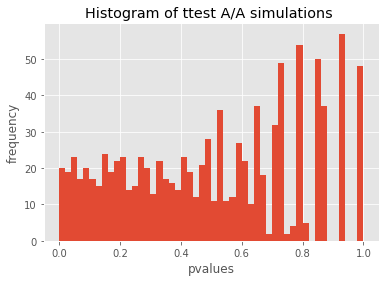

0.05

In [12]:
simulations = 1000
n_s = 1000
res = []

# Запуск симуляций A/A теста
for i in tqdm(range(simulations)):
    s1 = df[(df.experimentVariant == 0) & (df.version != 'v2.8.0')]['purchase'].sample(n_s, replace = False).values
    s2 = df[(df.experimentVariant == 1) & (df.version != 'v2.8.0')]['purchase'].sample(n_s, replace = False).values
    res.append(stats.ttest_ind(s1, s2, equal_var = False)[1]) # сохраняем pvalue

plt.hist(res, bins = 50)
plt.style.use('ggplot')
plt.xlabel('pvalues')
plt.ylabel('frequency')
plt.title("Histogram of ttest A/A simulations ")
plt.show()

# Проверяем, что количество ложноположительных случаев не превышает альфа
sum(np.array(res) <0.05) / simulations

### Выводы

Причина поломки в версии МП v2.8.0

Сгруппировав по варианту и по МП и посчитав конверсию в покупку заметно различие в конверсии в группе версии МП v2.8.0 CR =0.000993	и CR = 0.045606	 соответственно. Запустив А/А тест по этим версиям мы увидели, что количество ложноположительных случаев привышает альфа. Далее мы проводим А/А тест исключив группу v2.8.0 и получаем, что количество ложноположительных случаев не привышает альфа.